In [1]:
import warnings

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
import pandas as pd

import seaborn as sns

In [4]:
headers=["sepal_length","sepal_width","petal_length","petal_width","classes"]

In [5]:
dataset = pd.read_csv("https://raw.githubusercontent.com/leenaali1114/Data-Science-Datasets/main/iris.csv",names=headers)

In [6]:
dataset

,sepal_length,sepal_width,petal_length,petal_width,classes
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
dataset.shape

(150, 5)

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   classes       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<Axes: xlabel='sepal_length', ylabel='count'>

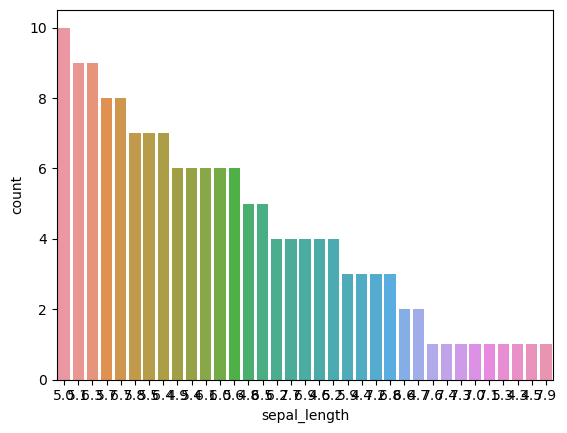

In [11]:
!pip install seaborn

import seaborn as sns

sns.countplot(x = 'sepal_length', data=dataset, order = dataset['sepal_length'].value_counts().index)

In [13]:
import matplotlib.pyplot as plt

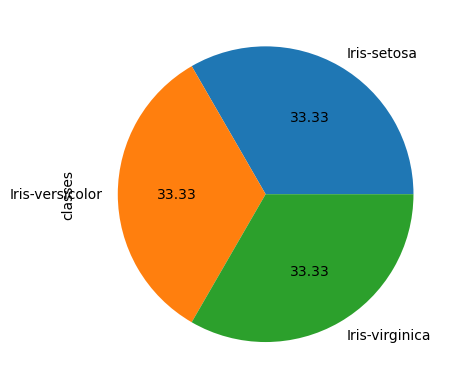

In [14]:
dataset['classes'].value_counts().plot(kind="pie", autopct="%.2f")

plt.show()

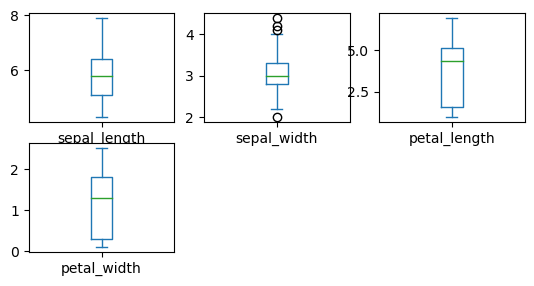

In [18]:
dataset.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)

plt.show()

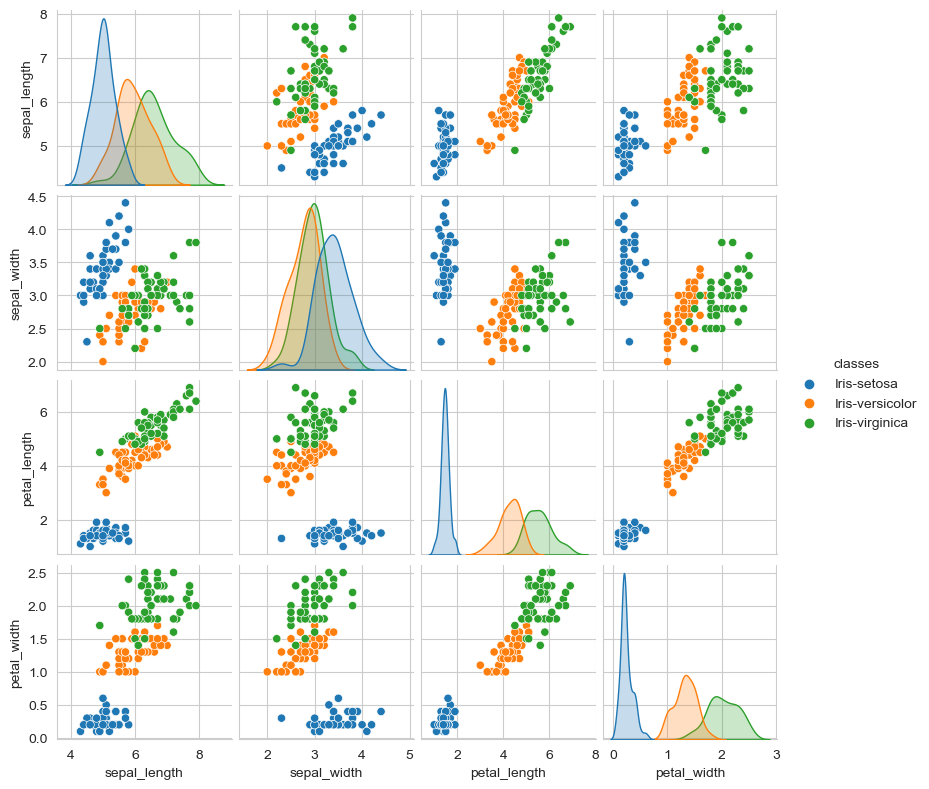

In [19]:
sns.set_style("whitegrid")
sns.pairplot(dataset, hue="classes", height=2)
plt.show()

In [33]:
from sklearn.metrics import accuracy_score

In [21]:
x = dataset.iloc[:,0:4].values
y = dataset.iloc[:,4].values

In [22]:
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [23]:
y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [25]:
print("x_train: ",x_train.shape)
print("y_train: ",y_train.shape)
print("x_test: ",x_test.shape)
print("y_test: ",y_test.shape)

x_train:  (105, 4)
y_train:  (105,)
x_test:  (45, 4)
y_test:  (45,)


In [26]:
model_lr = LogisticRegression(max_iter = 600)

In [27]:
model_lr.fit(x_train, y_train)

LogisticRegression(max_iter=600)

In [28]:
y_pred_lr = model_lr.predict(x_test)

In [34]:
print("Accuracy : ", accuracy_score(y_test, y_pred_lr))

Accuracy :  0.9777777777777777


In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
model_knn = KNeighborsClassifier()

In [37]:
model_knn.fit(x_train,y_train)

KNeighborsClassifier()

In [38]:
y_pred_knn = model_knn.predict(x_test)

In [39]:
print("Accuracy : ", accuracy_score(y_test, y_pred_knn))

Accuracy :  0.9777777777777777


In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
model_dt = DecisionTreeClassifier()

In [42]:
model_dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [43]:
y_pred_dt = model_dt.predict(x_test)

In [44]:
print("Accuracy : ", accuracy_score(y_test, y_pred_dt))

Accuracy :  0.9555555555555556


In [45]:
from sklearn.naive_bayes import GaussianNB

In [46]:
model_nb = GaussianNB()

In [47]:
model_nb.fit(x_train,y_train)

GaussianNB()

In [48]:
y_pred_nb = model_nb.predict(x_test)

In [49]:
print("Accuracy : ", accuracy_score(y_test, y_pred_nb))

Accuracy :  0.9333333333333333


In [50]:
from sklearn.svm import SVC

In [51]:
model_svc = SVC(gamma='auto')

In [52]:
model_svc.fit(x_train,y_train)

SVC(gamma='auto')

In [53]:
y_pred_svc = model_nb.predict(x_test)

In [54]:
print("Accuracy : ", accuracy_score(y_test, y_pred_svc))

Accuracy :  0.9333333333333333


In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
model_rf = RandomForestClassifier(n_estimators = 30, criterion = 'entropy', random_state = 0)

In [57]:
model_rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=30, random_state=0)

In [58]:
y_pred_rf = model_nb.predict(x_test)

In [59]:
print("Accuracy : ", accuracy_score(y_test, y_pred_svc))

Accuracy :  0.9333333333333333


In [61]:
from sklearn.ensemble import AdaBoostClassifier

In [64]:



# Create the AdaBoost classifier object
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1)



In [65]:
abc.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=1)

In [66]:
y_pred=abc.predict(x_test)

In [67]:
accuracy = np.mean(y_pred == y_test)

In [68]:
print("Accuracy:", accuracy)

Accuracy: 0.9555555555555556


In [69]:
Xnew = [[6.9, 3.1, 5.4, 2.1]]

ynew = model_dt.predict(Xnew)

print(ynew)

['Iris-virginica']
